# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project 2: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

<p></p>
>**Note:** In order to not clog the notebook too much, I wrote an external script to help me with some visualisations (both the markdown tables and also some charts that I build).
I also did some changes to pre-given functions in the "Setup" section in order to make those visualisations.
Also, I have to admit that this project took me quite some time to make some sense of the f1 scores. So, I'm not 100% sure about all of my reasonings.


### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: ** Since we are just trying to figure out if the student will "FAIL" or "NOT FAIL" we will be treating this as a classification problem for which we'll just want to predict and act based on those two labels (FAIL/NOT FAIL). 

If we were trying to predict the "risk" that a student has to fail. Say, a risk factor from -1 to 1. In that scenario, it would be a regression problem. 

This second scenario would be a much richer one:
- we would still have the same "feel" as in the classification labels given by the output's signal (negative value is perceived as no risk, positive value as risk)
- we would be able to figure out, from those in risk, whose were in more risk than the others
- these would also let us better tune our model if future iterations. Since we could then understand in which risk ranges the model performed better (or even ourselves were better suited to interveen)



## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns


# in order for the Graduation rate not looking funny in python 2
from __future__ import division

# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"

# to help me creating the data grids
from IPython.core.display import Markdown
import util_markdown as utilm

%matplotlib inline

Student data read successfully!


### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [2]:
#print student_data.info()
#print ""
#print ""
print "Frame shape: {}".format(student_data.shape)
print "Distinct 'passed': {}".format(student_data["passed"].unique()) ## ['no' 'yes'] - this shows us we dont's have nulls in the column


Frame shape: (395, 31)
Distinct 'passed': ['no' 'yes']


In [3]:
# Calculate number of students
n_students = len(student_data.index)

# Calculate number of features
n_features = len(student_data.columns)

# Calculate passing students
n_passed = len(student_data[student_data["passed"] == "yes"].index)

# Calculate failing students
n_failed = n_students - n_passed
##    for n_failed, since we only have 'yes' and 'no' we can do it this way. if we had some other values we would have to
## do another filter on the dataframe. something like len(student_data[student_data["passed"] == "no"].index) 

# Calculate graduation rate
grad_rate = n_passed / n_students * 100
## I am not sure about this "* 100", since we are being asked a rate but then the output is preformated with a percentage...

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of features: 31
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [4]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head()

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       

In [5]:
## lets run this to see if we have any weird values
##

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

for col in feature_cols:
    if(student_data[col].dtype == "object"):
        print "Distinct values for {}: {}".format(col, student_data[col].unique())

print ""
print "Distinct values for {}: {}".format(target_col, student_data[target_col].unique())
print ""
        
for col in feature_cols:
    if student_data[col].dtype in numerics:
        print "Range values for {}: [{},{}]".format(col, student_data[col].min(), student_data[col].max())



Distinct values for school: ['GP' 'MS']
Distinct values for sex: ['F' 'M']
Distinct values for address: ['U' 'R']
Distinct values for famsize: ['GT3' 'LE3']
Distinct values for Pstatus: ['A' 'T']
Distinct values for Mjob: ['at_home' 'health' 'other' 'services' 'teacher']
Distinct values for Fjob: ['teacher' 'other' 'services' 'health' 'at_home']
Distinct values for reason: ['course' 'other' 'home' 'reputation']
Distinct values for guardian: ['mother' 'father' 'other']
Distinct values for schoolsup: ['yes' 'no']
Distinct values for famsup: ['no' 'yes']
Distinct values for paid: ['no' 'yes']
Distinct values for activities: ['no' 'yes']
Distinct values for nursery: ['yes' 'no']
Distinct values for higher: ['yes' 'no']
Distinct values for internet: ['no' 'yes']
Distinct values for romantic: ['no' 'yes']

Distinct values for passed: ['no' 'yes']

Range values for age: [15,22]
Range values for Medu: [0,4]
Range values for Fedu: [0,4]
Range values for traveltime: [1,4]
Range values for studyt

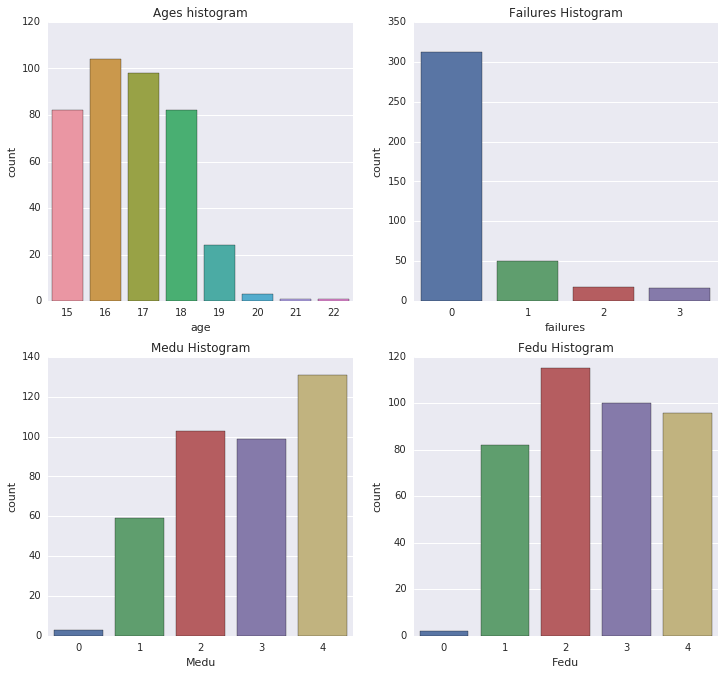

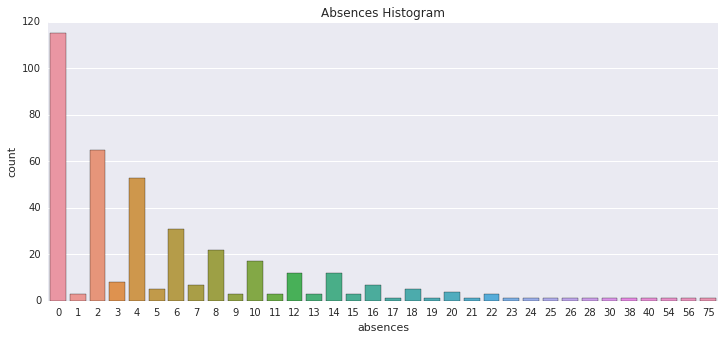

In [6]:
## even though we have some numeric data, it seems to be mostly discrete
## lets further look into it...
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[12,11], squeeze=True)

sns.countplot(student_data["age"], ax=axes[0,0]);      axes[0,0].set_title('Ages histogram')
sns.countplot(student_data["failures"], ax=axes[0,1]); axes[0,1].set_title('Failures Histogram')
sns.countplot(student_data["Medu"], ax=axes[1,0]);     axes[1,0].set_title('Medu Histogram')
sns.countplot(student_data["Fedu"], ax=axes[1,1]);     axes[1,1].set_title('Fedu Histogram')

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=[12,5], squeeze=False)
sns.countplot(student_data["absences"], ax=axes[0,0]); axes[0,0].set_title('Absences Histogram')



In [7]:
## looks like it is. lets also call 'unique' on them

for col in feature_cols:
    if student_data[col].dtype in numerics:
        print "Distinct values for {}: {}".format(col, student_data[col].unique())


Distinct values for age: [18 17 15 16 19 22 20 21]
Distinct values for Medu: [4 1 3 2 0]
Distinct values for Fedu: [4 1 2 3 0]
Distinct values for traveltime: [2 1 3 4]
Distinct values for studytime: [2 3 1 4]
Distinct values for failures: [0 3 2 1]
Distinct values for famrel: [4 5 3 1 2]
Distinct values for freetime: [3 2 4 1 5]
Distinct values for goout: [4 3 2 1 5]
Distinct values for Dalc: [1 2 5 3 4]
Distinct values for Walc: [1 3 2 4 5]
Distinct values for health: [3 5 1 2 4]
Distinct values for absences: [ 6  4 10  2  0 16 14  7  8 25 12 54 18 26 20 56 24 28  5 13 15 22  3 21  1
 75 30 19  9 11 38 40 23 17]


### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [8]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [26]:
# TODO: Import any additional functionality you may need here
from sklearn.cross_validation import train_test_split

# TODO: Set the number of training points
num_train = 300

# Set the number of testing points
num_test = X_all.shape[0] - num_train

X_train = None
X_test = None
y_train = None
y_test = None


X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, train_size=num_train, test_size=num_test, random_state=20160927)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 300 samples.
Testing set has 95 samples.


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. For each model chosen*
- Describe one real-world application in industry where the model can be applied. *(You may need to do a small bit of research for this — give references!)* 
- What are the strengths of the model; when does it perform well? 
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

**Answer: ** 

>**Note:** For this answer I had to revisit some of the lessons and also read a bit about Random Forests. With all that 'side-research' I came up with a matrix (with refs) that I compiled into [a google spreadsheet](https://docs.google.com/spreadsheets/d/1STvCecX3y7Kc0-3ArLg_U2KtsV8sGxY7u7jWWniT2ww/edit#gid=0).


#### *AdaBoost*

** Use case ** - I found an [article](http://www.uni-obuda.hu/journal/Markoski_Ivankovic_Ratgeber_Pecev_Glusac_57.pdf) from Óbuda University in Budapest in which Adaboot was used for a computer vision problem in order to identify basketball players from video.

** Strengths ** 
- makes complex predictions with simple classifiers
- it is a margin optimization algorithm, so it tends to not overfit
- not so good for noisy data

** Weaknesses **
- it might need bigger sample sizes for the 'weak learner' condition to hold true


<p>&nbsp;</p>
#### *Random Forest*

** Use case ** - I found some [research](http://www.cse.chalmers.se/edu/year/2011/course/TDA361/Advanced%20Computer%20Graphics/BodyPartRecognition.pdf) about human body part tracking and recognition in real time from Microsoft Research Cambridge & Xbox Incubation

** Strengths ** 
- works well with non linear data
- since it is an ensemble method, it is less prone to overfit compared to the Decision Trees algorithm

** Weaknesses **
- usually slower in the runtime, while predicting


<p>&nbsp;</p>
#### *Support Vector Machines*
** Use case ** - I found [an article](https://www.utdallas.edu/~lkhan/papers/Effective%20Intrusion%20Detection%20Using%20Support%20Vector%20Machines.pdf) in which SVMs are usedd Intrusion Detection and Attack Detection in a network.

** Strengths ** 
 - Good for large feature sets
 - does well even with multi-class classification
 - since it tries to maximize the margin, it can work as an
optimization problem

** Weaknesses **
 - Result can be hard to interpret
 - predicting performance degrades when support vectors' coefficients get too large
 - memory intensive
 - with rbf kernel, it might need a preprocessing of numerical variables in order to normalize them (so that variables with bigger ranges don't over power variables with smaller ranges)
 


### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [27]:
"""
I made some changes here in order to be able to retrieve both the times and the results from each function
"""

def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)
    return end - start

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    _r = [None, None]
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    _r[0] = end - start
    _r[1] = f1_score(target.values, y_pred, pos_label='yes')
    print "Made predictions in {:.4f} seconds.".format(_r[0])
    return _r


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    _r = [None, None, None, None, None, None, None]
    
    _r[0] = clf.__class__.__name__
    _r[1] = len(X_train)
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(_r[0], _r[1])
    
    # Train the classifier
    _r[2] = train_classifier(clf, X_train, y_train)
    
    _aux = predict_labels(clf, X_train, y_train)
    _r[3] = _aux[0]
    _r[4] = _aux[1]
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(_r[4])
    
    _aux = predict_labels(clf, X_test, y_test)
    _r[5] = _aux[0]
    _r[6] = _aux[1]
    print "F1 score for test set: {:.4f}.".format(_r[6])
    return _r
    

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [28]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# TODO: Initialize the three models
classifiers = [
AdaBoostClassifier()
,RandomForestClassifier()
,SVC()
]

# TODO: Set up the training set sizes
train_sizes = np.arange(100, 301, 100)

# TODO: Execute the 'train_predict' function for each classifier and each training set size
results = []

for idx_clf, itr_clf in enumerate(classifiers):
    for itr_size in train_sizes:
        results.append(train_predict(itr_clf, X_train[0:itr_size], y_train[0:itr_size], X_test, y_test))
        print ""

        print ""
    print ""

Training a AdaBoostClassifier using a training set size of 100. . .
Trained model in 0.1686 seconds
Made predictions in 0.0105 seconds.
F1 score for training set: 0.9388.
Made predictions in 0.0104 seconds.
F1 score for test set: 0.7164.


Training a AdaBoostClassifier using a training set size of 200. . .
Trained model in 0.1636 seconds
Made predictions in 0.0122 seconds.
F1 score for training set: 0.8723.
Made predictions in 0.0104 seconds.
F1 score for test set: 0.8085.


Training a AdaBoostClassifier using a training set size of 300. . .
Trained model in 0.1695 seconds
Made predictions in 0.0154 seconds.
F1 score for training set: 0.8241.
Made predictions in 0.0106 seconds.
F1 score for test set: 0.7794.



Training a RandomForestClassifier using a training set size of 100. . .
Trained model in 0.0353 seconds
Made predictions in 0.0018 seconds.
F1 score for training set: 0.9790.
Made predictions in 0.0019 seconds.
F1 score for test set: 0.7737.


Training a RandomForestClassifier u

In [29]:
df_result = pd.DataFrame(results, columns=["classifier","test_size","train_time_t","pred_time_t","f1_train","pred_time_tst","f1_test"])

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

In [30]:
Markdown(utilm.dframe_to_markdown(df_result))




** Classifer - AdaBoostClassifier**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100 | 0.1685631275177002 | 0.010415077209472656 | 0.9387755102040817 | 0.7164179104477613 |
| 200 | 0.16358280181884766 | 0.010385990142822266 | 0.8723404255319148 | 0.8085106382978724 |
| 300 | 0.16947102546691895 | 0.010623931884765625 | 0.8240963855421687 | 0.7794117647058824 |


** Classifer - RandomForestClassifier**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100 | 0.035310983657836914 | 0.0019130706787109375 | 0.9790209790209791 | 0.7737226277372262 |
| 200 | 0.03683209419250488 | 0.001748800277709961 | 0.9777777777777777 | 0.8142857142857144 |
| 300 | 0.03734588623046875 | 0.0017628669738769531 | 0.9948979591836735 | 0.7669172932330827 |


** Classifer - SVC**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100 | 0.0021409988403320312 | 0.0012431144714355469 | 0.8588957055214724 | 0.8375 |
| 200 | 0.006148099899291992 | 0.002156972885131836 | 0.8844884488448845 | 0.8266666666666668 |
| 300 | 0.012817144393920898 | 0.003061056137084961 | 0.8603104212860309 | 0.7887323943661971 |

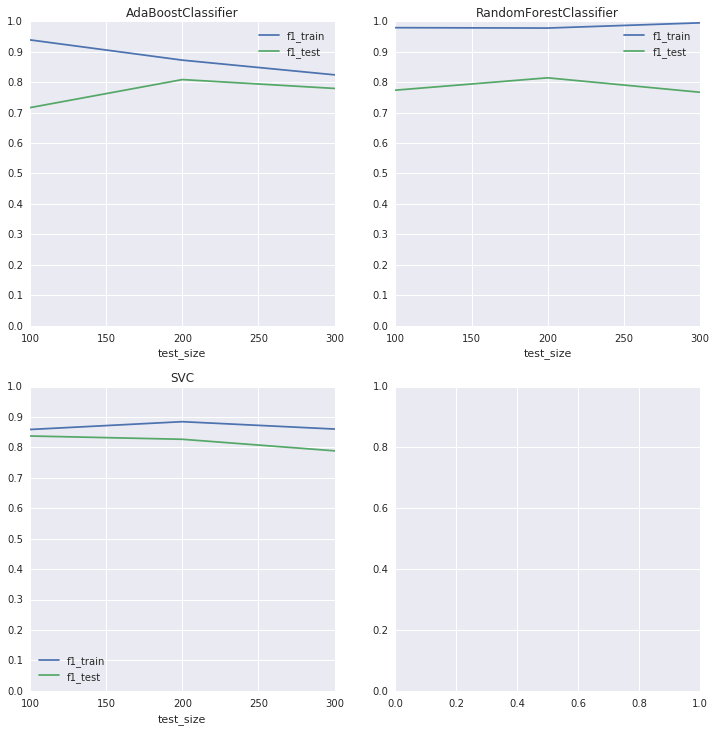

In [31]:
utilm.render_scores(df_result)

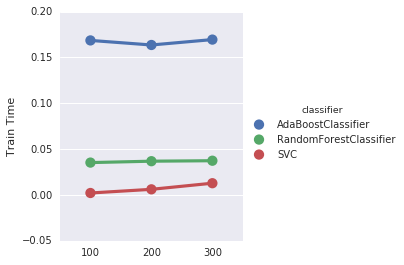

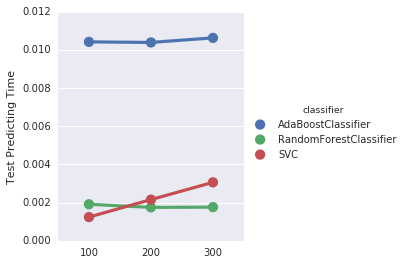

In [32]:
utilm.render_times(df_result)

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Choosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

**Answer: ** 

In order to visualize the results I did a bit of changing in the source code so that I could store each train/test iteration in a dataframe so that I could then visualize the train and test lines for each classifier.

At a first glance, I would say that our dataset is too small in order for us to provide a well grounded conclusion about the problem. My reasoning for that is because:
- all your classifiers seem to be overfitting (some more than others)
- across the data splits we don't get to see the neither of the lines undoubtedly converge to any given value in particular.


Regarding each model's scores:
- **Adaboost** - It looks like the training and testing curves are set to converge sooner that the other two. And even though it is on a declining trend, at sample size 300 it yelds a score close enough to svm's. Adaboost showed the worst performance times.

- **Random Forest** - The Random Forest model ended up yielding the worst f1 score in testing. All the training scores were too high (closest to 1) which could indicate overfitting of the model or a case of high variance since it has the biggest gaps between training and testing. It is possible that it could yield more consistent results if we tweaked the hyper parameters before adding more data, but for this question's sake, we will leave that scenario out. I think that in a real world scenario, we wouldn't necessarily try hyper parameter optimisation only with 'THE-ONE' Classifier. And would make sense to at least try comparing our top options at their best.

- **SVM** - From the SVM's curve, it looks like the model started to diverge between training and testing a little bit in the 300 data split. Although it yielded better f1-scores across all splits than the rest of the classifiers.


All things considered, I will be choosing SVM for our problem. It ended up with the best f1 score during training and is on the "lower" side of the prediction times.

### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Answer: **

In order to help classify and predict before-hand which students in your institution are more likely to fail to graduate, we have been evaluating the better algorithm to help us in that task.
After analysing and running our research and benchmarks on top of the data provided to us, we decided to use the Support Vector Machine algorithm (SVM), which is a supervised learning algorithm.

What we mean by supervised is that we will be trying to predict the new students' graduation outcomes based on the outcomes observed in some data that we passed to the algorithm before hand.

The algorithm will be laying out the data in some sort of multi dimensional map that takes into account all the known 31 fields in the data file that you provided us (plus some other fields generated by the algorithm itself) and trying to circle out in that map which areas belong to either Failing areas or Graduating areas. It also makes sure that it finds the areas that make that separation with most confidence posible taking into account the data that we are giving it before hand.

Afterwards, it is simply a matter of maping the new students to the predefined areas in order to classify his/her graduation outcome.

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [39]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import make_scorer


def f1_wrapper(X, y):
    return f1_score(X, y, pos_label="yes")

clf = SVC()
parameters = {'kernel': ['rbf','linear'], 'gamma': [1e-3, 1e-4],'C': [1, 10, 100, 1000]}

cv_sets = ShuffleSplit(X_train.shape[0], n_iter = 10, test_size = 0.15, random_state=20160927)

# Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_wrapper)

# Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj =  GridSearchCV(clf, parameters, scoring=f1_scorer, cv=cv_sets, n_jobs=2)

#Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train)[1])
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test)[1])


Made predictions in 0.0108 seconds.
Tuned model has a training F1 score of 0.8086.
Made predictions in 0.0033 seconds.
Tuned model has a testing F1 score of 0.8662.


## Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

**Answer: ** The final F1-Score is 0.8662. It ended up being 9.8 % better than the previous score without hyper parameter tunning.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.